<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 6:  Web Scraping
### Finding Underpriced RVs on Craigslist

![](https://snag.gy/WrdUMx.jpg)

In this project we will be practicing our web scraping skills.  You can use Scrapy or Python requests in order to complete this project.  It may be helpful to write some prototype code in this notebook to test your assumptions, then move it into a Python file that can be run from the command line.

> In order to run code from the command line, instead of the notebook, you just need to save your code to a file (with a .py extension), and run it using the Python interpreter:<br><br>
> `python my_file.py`

You will be building a process to scrape a single category of search results on Craigslist, that can easily be applied to other categories by changing the search terms.  The main goal is to be able to target and scrape a single page given a set of parameters.

**If you use Scrapy, provide your code in a folder.**

## Import your libraries for scrapy / requests / pandas / numpy / etc
Setup whichever libraries you need. Review past material for reference.

In [1]:
# PREPARE REQUIRED LIBRARIES
import requests
import pandas as pd
import numpy as np
import scrapy
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scrapy.selector import Selector
from scrapy.http import HtmlResponse

from bs4 import BeautifulSoup

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.  Scrape for the largest US cities (non-exhaustive list)
Search, research, and scrape Wikipedia for a list of the largest US cities.  There are a few sources but find one that is in a nice table.  We don't want all cities, just signifficant cities.  Examine your source.  Look for what can be differentiable.

- Use requests
- Build XPath query(ies)
- Extract to a list
- Clean your list

In [17]:
# SCRAPE WIKIPEDIA FOR LARGEST US CITIES (NON-EXHAUSTIVE LIST)
import requests

response = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_area")
HTML = response.text  
HTML[0:500]           # view the first 500 characters of the HTML index document for DataTau

u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of United States cities by area - Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Uni'

In [ ]:
#####################################
# BeautifulSoup(HTML, 'html')

In [18]:
from scrapy.selector import Selector

# find the cities on the list. I had to use three relative references!
# //td[2] is so I can could return more than one item.  
# The //a is because there were some that were found in //td[2]/a and 
# others found in //td[2]/b/a.  Using //a allowed me to find both!

# Then using the //table[@class...] bit allowed me to choose only the items
# in the cities table. Previously I was also pulling items from an earlier
# table. 
cities_path = '//table[contains(@class,"wikitable")]//td[2]//a/text()'
cities_list = Selector(text=HTML).xpath(cities_path).extract()

In [19]:
cities_list

[u'Sitka',
 u'Juneau',
 u'Wrangell',
 u'Anchorage',
 u'Jacksonville',
 u'Anaconda',
 u'Butte',
 u'Oklahoma City',
 u'Houston',
 u'Phoenix',
 u'Nashville',
 u'Los Angeles',
 u'San Antonio',
 u'Suffolk',
 u'Buckeye',
 u'Indianapolis',
 u'Chesapeake',
 u'Dallas',
 u'Fort Worth',
 u'Louisville',
 u'San Diego',
 u'Memphis',
 u'Kansas City',
 u'New York City',
 u'Augusta',
 u'Austin',
 u'Charlotte',
 u'Lexington',
 u'El Paso',
 u'Macon',
 u'Virginia Beach',
 u'Cusseta',
 u'Chicago',
 u'Tucson',
 u'Columbus',
 u'Columbus',
 u'Valdez',
 u'Preston',
 u'Huntsville',
 u'Boulder City',
 u'California City',
 u'Tulsa',
 u'Colorado Springs',
 u'Goodyear',
 u'Albuquerque',
 u'Scottsdale',
 u'Hibbing',
 u'Norman',
 u'San Jose',
 u'Peoria',
 u'New Orleans',
 u'Corpus Christi',
 u'Montgomery',
 u'Wichita',
 u'Aurora',
 u'Denver',
 u'Sierra Vista',
 u'Georgetown',
 u'Birmingham',
 u'Fayetteville',
 u'Carson City',
 u'Raleigh',
 u'Bakersfield',
 u'Mobile',
 u'Detroit',
 u'Bunnell',
 u'Mesa',
 u'Las Vegas',

In [20]:
# the str() function gets rid of the unicode prefix "u"
cities_list = [str(x) for x in cities_list]
cities_list

['Sitka',
 'Juneau',
 'Wrangell',
 'Anchorage',
 'Jacksonville',
 'Anaconda',
 'Butte',
 'Oklahoma City',
 'Houston',
 'Phoenix',
 'Nashville',
 'Los Angeles',
 'San Antonio',
 'Suffolk',
 'Buckeye',
 'Indianapolis',
 'Chesapeake',
 'Dallas',
 'Fort Worth',
 'Louisville',
 'San Diego',
 'Memphis',
 'Kansas City',
 'New York City',
 'Augusta',
 'Austin',
 'Charlotte',
 'Lexington',
 'El Paso',
 'Macon',
 'Virginia Beach',
 'Cusseta',
 'Chicago',
 'Tucson',
 'Columbus',
 'Columbus',
 'Valdez',
 'Preston',
 'Huntsville',
 'Boulder City',
 'California City',
 'Tulsa',
 'Colorado Springs',
 'Goodyear',
 'Albuquerque',
 'Scottsdale',
 'Hibbing',
 'Norman',
 'San Jose',
 'Peoria',
 'New Orleans',
 'Corpus Christi',
 'Montgomery',
 'Wichita',
 'Aurora',
 'Denver',
 'Sierra Vista',
 'Georgetown',
 'Birmingham',
 'Fayetteville',
 'Carson City',
 'Raleigh',
 'Bakersfield',
 'Mobile',
 'Detroit',
 'Bunnell',
 'Mesa',
 'Las Vegas',
 'Chattanooga',
 'Philadelphia',
 'Portland',
 'Atlanta',
 'Winston

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.2 Only retain cities with properly formed ASCII

Optionally, filter out any cities with impropper ASCII characters.  A smaller list will be easier to look at.  However you may not need to filter these if you spend more time scraping a more concise city list.  This list should help you narrow down the list of regional Craigslist sites.

In [ ]:
# didn't use this  - from dave's class
# def is_ascii(s):
#     return all(ord(c) != 91 and ord(c)<128 for c in s)

In [21]:
# ONLY RETAIN PROPERLY FORMED CITIES WITH FILTERING FUNCTION

from curses.ascii import isascii

cleaned_cities_list = []

for city in cities_list:
    # since they are all strings
    non_ascii_count = sum([0 if isascii(char)==True else 1 for char in city])

    if non_ascii_count == 0:
        cleaned_cities_list.append(city)
        
print len(cleaned_cities_list)
# ie none of them have improperly formed ascii characters
cleaned_cities_list

151


['Sitka',
 'Juneau',
 'Wrangell',
 'Anchorage',
 'Jacksonville',
 'Anaconda',
 'Butte',
 'Oklahoma City',
 'Houston',
 'Phoenix',
 'Nashville',
 'Los Angeles',
 'San Antonio',
 'Suffolk',
 'Buckeye',
 'Indianapolis',
 'Chesapeake',
 'Dallas',
 'Fort Worth',
 'Louisville',
 'San Diego',
 'Memphis',
 'Kansas City',
 'New York City',
 'Augusta',
 'Austin',
 'Charlotte',
 'Lexington',
 'El Paso',
 'Macon',
 'Virginia Beach',
 'Cusseta',
 'Chicago',
 'Tucson',
 'Columbus',
 'Columbus',
 'Valdez',
 'Preston',
 'Huntsville',
 'Boulder City',
 'California City',
 'Tulsa',
 'Colorado Springs',
 'Goodyear',
 'Albuquerque',
 'Scottsdale',
 'Hibbing',
 'Norman',
 'San Jose',
 'Peoria',
 'New Orleans',
 'Corpus Christi',
 'Montgomery',
 'Wichita',
 'Aurora',
 'Denver',
 'Sierra Vista',
 'Georgetown',
 'Birmingham',
 'Fayetteville',
 'Carson City',
 'Raleigh',
 'Bakersfield',
 'Mobile',
 'Detroit',
 'Bunnell',
 'Mesa',
 'Las Vegas',
 'Chattanooga',
 'Philadelphia',
 'Portland',
 'Atlanta',
 'Winston

In [22]:
# also, using the filter function:

filtered_cities_list = filter(lambda x: sum([0 if isascii(char)==True else 1 for char in x])==0, cities_list)

print len(filtered_cities_list)
# ie none of them have improperly formed ascii characters
filtered_cities_list

151


['Sitka',
 'Juneau',
 'Wrangell',
 'Anchorage',
 'Jacksonville',
 'Anaconda',
 'Butte',
 'Oklahoma City',
 'Houston',
 'Phoenix',
 'Nashville',
 'Los Angeles',
 'San Antonio',
 'Suffolk',
 'Buckeye',
 'Indianapolis',
 'Chesapeake',
 'Dallas',
 'Fort Worth',
 'Louisville',
 'San Diego',
 'Memphis',
 'Kansas City',
 'New York City',
 'Augusta',
 'Austin',
 'Charlotte',
 'Lexington',
 'El Paso',
 'Macon',
 'Virginia Beach',
 'Cusseta',
 'Chicago',
 'Tucson',
 'Columbus',
 'Columbus',
 'Valdez',
 'Preston',
 'Huntsville',
 'Boulder City',
 'California City',
 'Tulsa',
 'Colorado Springs',
 'Goodyear',
 'Albuquerque',
 'Scottsdale',
 'Hibbing',
 'Norman',
 'San Jose',
 'Peoria',
 'New Orleans',
 'Corpus Christi',
 'Montgomery',
 'Wichita',
 'Aurora',
 'Denver',
 'Sierra Vista',
 'Georgetown',
 'Birmingham',
 'Fayetteville',
 'Carson City',
 'Raleigh',
 'Bakersfield',
 'Mobile',
 'Detroit',
 'Bunnell',
 'Mesa',
 'Las Vegas',
 'Chattanooga',
 'Philadelphia',
 'Portland',
 'Atlanta',
 'Winston

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.  Write a function to capture current pricing information via Craigslist in one city.
Choose a city from your scraped data, then go to the cooresponding city section on Craigslist, searching for "rv" in the auto section.  Write a method that pulls out the prices.

In [23]:
def pull_rv_prices(weblink):
    response = requests.get(weblink)
    HTML = response.text  
    rv_price_path = "//p[@class='row']/span[@class='txt']/span[@class='l2']/span[@class='price']/text()"
    rv_price_list = Selector(text=HTML).xpath(rv_price_path).extract()
    rv_price_list = [str(price) for price in rv_price_list]
    return rv_price_list

pull_rv_prices('http://detroit.craigslist.org/search/rva')

    
    
    

['$3700',
 '$950',
 '$78999',
 '$82500',
 '$1200',
 '$25172',
 '$2800',
 '$2950',
 '$4500',
 '$325',
 '$11199',
 '$4500',
 '$22900',
 '$11000',
 '$11500',
 '$11500',
 '$6500',
 '$6000',
 '$22000',
 '$3500',
 '$11000',
 '$2800',
 '$4750',
 '$2900',
 '$8000',
 '$9500',
 '$6000',
 '$6750',
 '$6750',
 '$175',
 '$75',
 '$2000',
 '$8999',
 '$6999',
 '$500',
 '$2900',
 '$225',
 '$6400',
 '$5900',
 '$13000',
 '$2895',
 '$52576',
 '$9900',
 '$3500',
 '$11900',
 '$3100',
 '$8000',
 '$29777',
 '$15000',
 '$5500',
 '$3000',
 '$28500',
 '$19599',
 '$15990',
 '$41240',
 '$13899',
 '$31900',
 '$13700',
 '$200',
 '$4100',
 '$10500',
 '$4996',
 '$12996',
 '$17600',
 '$10',
 '$10',
 '$140',
 '$100',
 '$100',
 '$26900',
 '$5000',
 '$5850',
 '$14699',
 '$27440',
 '$5995',
 '$14275',
 '$69750',
 '$1200',
 '$1200',
 '$6000',
 '$39999',
 '$45998',
 '$18395',
 '$13986',
 '$3800',
 '$11500']

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.1 Create a mapping of cities to cooresponding regional Craigslist URLs

Major US cities on Craigslist typically have their own cooresponding section (ie: SFBay Area, NYC, Boston, Miami, Seattle, etc).  Later, you will use these to query search results for various metropolitian regions listed on Craigslist.  Between the major metropolitan Craigslist sites, the only thing that will differ is the URL's that correspond to them.

The point of the "mapping":  Create a data structure that allows you to iterate with both the name of the city from Wikipedia, with the cooresponding variable that that will allow you to construct each craigslist URL for each region.

> For San Francsico (the Bay Area metropolitan area), the url for the RV search result is:
> http://sfbay.craigslist.org/search/sss?query=rv
>
> The convention is http://[region].craigslist.org/search/sss?query=rf
> Replacing [region] with the cooresponding city name will allow you to quickly iterate through each regional Craigslist site, and scrape the prices from the search results.  Keep this in mind while you build this "mapping".


In [24]:
# OK since I pulled largest cities by AREA, I'm going to revise my cities list so
# that I pull by population - since we're going to use Craigslist based on those
# cities.   Going to use top 25

response = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
HTML = response.text  
new_cities_path = '//table[7]//table//td/div/a[1]/text()'
new_cities_list = Selector(text=HTML).xpath(new_cities_path).extract()
new_cities_list = [str(city) for city in new_cities_list]
new_cities_list25 = new_cities_list[0:25]

In [25]:
new_cities_list25

['New York',
 'Los Angeles',
 'Chicago',
 'Houston',
 'Philadelphia',
 'Phoenix, Arizona',
 'San Antonio',
 'San Diego',
 'Dallas',
 'San Jose, California',
 'Austin, Texas',
 'Jacksonville, Florida',
 'San Francisco',
 'Indianapolis',
 'Columbus, Ohio',
 'Fort Worth, Texas',
 'Charlotte, North Carolina',
 'Seattle',
 'Denver',
 'El Paso, Texas',
 'Detroit',
 'Washington, District of Columbia',
 'Boston',
 'Memphis, Tennessee',
 'Nashville, Tennessee']

In [26]:
cities_CL_dict = {
    'New York'                  : 'newyork',
    'Los Angeles'               : 'losangeles',
    'Chicago'                   : 'chicago',
    'Houston'                   : 'houston',
    'Philadelphia'              : 'philadelphia',
    'Phoenix, Arizona'          : 'phoenix',
    'San Antonio'               : 'sanantonio',
    'San Diego'                 : 'sandiego',
    'Dallas'                    : 'dallas',
    'San Jose, California'      : 'sfbay', # has a sby subcategory
    'Austin, Texas'             : 'austin',
    'Jacksonville, Florida'     : 'jacksonville',
    'San Francisco'             : 'sfbay',
    'Indianapolis'              : 'indianapolis',
    'Columbus, Ohio'            : 'columbus',
    'Fort Worth, Texas'         : 'dallas', # has a ftw subcategory
    'Charlotte, North Carolina' : 'charlotte',
    'Seattle'                   : 'seattle',
    'Denver'                    : 'denver',
    'El Paso, Texas'            : 'elpaso',
    'Detroit'                   : 'detroit',
    'Washington, District of Columbia' : 'washingtondc',
    'Boston'                    : 'boston',
    'Memphis, Tennessee'        : 'memphis',
    'Nashville, Tennessee'      : 'nashville'
}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Define a function to caculate mean and median price per city.

Now that you've created a list of cities you want to scrape, adapt your solution for grabbing data in one region site, to grab data for all regional sites that you collected, then calculate the mean and median price of RV results from each city.

> Look at the URLs from a few different regions (ie: portland, phoenix, sfbay), and find what they have in common.  Determine the area in the URL string that needs to change the least, and figure out how to replace only that portion of the URL in order to iterate through each city.

In [29]:
def pull_rv_prices(city_wiki):
    city_craig = cities_CL_dict[city_wiki]
#     print city_craig
    weblink = 'http://' + city_craig + '.craigslist.org/search/rva'
    response = requests.get(weblink)
    HTML = response.text  
    rv_price_path = "//p[@class='row']/span[@class='txt']/span[@class='l2']/span[@class='price']/text()"
    rv_price_list = Selector(text=HTML).xpath(rv_price_path).extract()
    rv_price_list = [int(str(price).replace("$",'')) for price in rv_price_list]
    return rv_price_list

def find_mean_median(list):
    return (np.mean(list), np.median(list))

def return_mm_rv_prices_as_dict(city_list):
    city_price_dict = {}

    for city in city_list:
        prices = pull_rv_prices(city)
        mean_median_prices = find_mean_median(prices)
        city_price_dict[city] = mean_median_prices

    return city_price_dict
    
def return_mm_rv_prices_as_df(city_list):
    mean_median_price_list = []
    for city in city_list:
        prices = pull_rv_prices(city)
        mean_median_prices = find_mean_median(prices)
        mean_median_price_list.append(mean_median_prices)
    means, medians = zip(*mean_median_price_list) 
    city_price_df = pd.DataFrame({'city':city_list,'mean':means, 
                                  'median':medians })
    
    return city_price_df


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Run your scraping process, and save your results to a CSV file.

In [30]:
cities_df = return_mm_rv_prices_as_df(cities_CL_dict.keys())

cities_df.to_csv('cities_prices')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Do an analysis of the RV market.

Go head we'll wait.  Anything notable about the data?

In [31]:
cities_df

,city,mean,median
0,San Diego,15042.428571,7900.0
1,"Charlotte, North Carolina",8746.384615,6495.0
2,Chicago,20048.742268,15699.0
3,Philadelphia,19942.287500,9900.0
4,Denver,16532.814433,6500.0
5,"Phoenix, Arizona",33824.988372,25606.0
6,Dallas,31767.011364,20472.5
7,"San Jose, California",30641.905660,22995.0
8,"Memphis, Tennessee",15381.461538,3500.0
9,San Francisco,30641.905660,22995.0


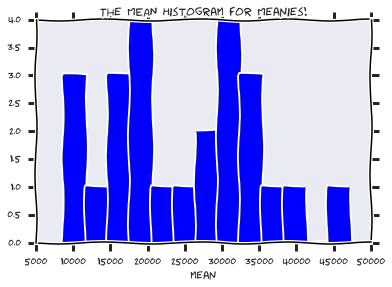

In [32]:
fig = plt.figure()
plt.xkcd() # wheeeee
ax = fig.gca()
ax.hist(cities_df['mean'], bins=13)
ax.set_xlabel('mean')
ax.set_title("The MEAN Histogram for Meanies!")

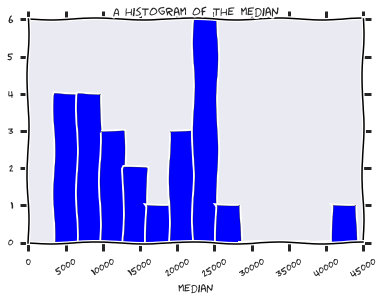

In [33]:
plt.hist(cities_df['median'], bins=13)
plt.xlabel('median')
plt.xticks(rotation=30)
plt.title('A histogram of the median')

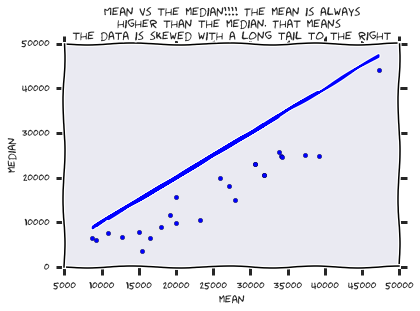

In [34]:
plt.scatter(cities_df['mean'], cities_df['median'])
plt.plot(cities_df['mean'],cities_df['mean'])
plt.xlabel("mean")
plt.ylabel("median")
plt.title("Mean vs the median!!!! The mean is always\nhigher than the median. That means \nthe data is skewed with a long tail to the right")

In [35]:
cities_df.describe()

,mean,median
count,25.000000,25.000000
mean,24822.213004,16398.860000
std,10265.309553,9453.376802
min,8746.384615,3500.000000
25%,16532.814433,7900.000000
50%,25933.695652,15699.000000
75%,31767.011364,22995.000000
max,47271.916667,43995.000000


In [36]:
# 1 for east coast-ish, 0 for central US, -1 for west coast-ish
# I eyeballed it
location_list = [-1, 1, 0, 1, -1, -1, 0, -1, 1, -1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0 , 1, 1, 1, -1]

cities_df['location_num'] = location_list


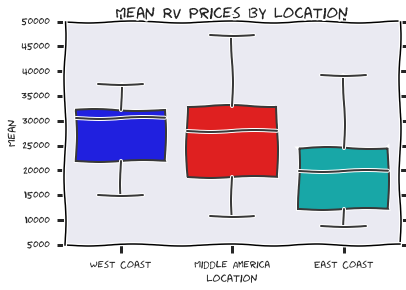

In [44]:
ax = sns.boxplot(cities_df['location_num'], cities_df['mean'])#, cities_df['median'], )
ax.set(xticklabels=['West Coast', 'Middle America', 'East Coast'])
sns.axlabel('Location', 'Mean')
ax.set_title('Mean RV Prices by Location', fontsize=16)

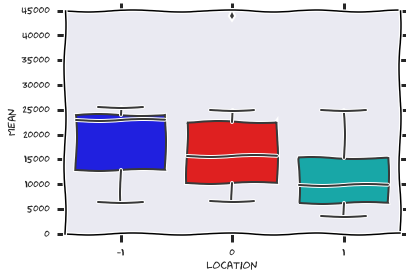

In [45]:
sns.boxplot(cities_df['location_num'], cities_df['median'] )
ax.set(xticklabels=['West Coast', 'Middle America', 'East Coast'])
sns.axlabel('Location', 'Mean')
ax.set_title('Median RV Prices by Location', fontsize=16)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Does it makes sense to buy RVs in one region and sell them in another?

Assuming the cost of shipping or driving from one regional market to another.

In [ ]:
# I think I'd have to dig into the data more - it's not clear to me what is 
# driving the difference in price - quality of the RV? Demand vs supply? 
# However, if we make a huge generalization and assume that the asset is the same 
# no matter where it's being sold, then yes, it seems that the RV in the middle
# of America is being listed for more. So I'd buy in the East Coast and sell in 
# the middle of America.

# (based on my boxplots)

# SO ---
# the data changed the second time I ran this, so I would probably want
# to gather more information and figure out what REALLY is the state of
# the RV market?  What I mean is that I gathered info that showed that
# the middle of America CLEARLY had higher mean AND median prices.  Then
# I ran it again today (a few days later) and the boxplots changed.
# So my conclusion might not be 100% correct anymore.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.2 Can you pull out the "make" from the markup and include that in your analyis?
How reliable is this data and does it make sense?

In [46]:
def pull_rv_prices_titles(city_wiki):
    city_craig = cities_CL_dict[city_wiki]
#     print city_craig
    weblink = 'http://' + city_craig + '.craigslist.org/search/rva'
    response = requests.get(weblink)
    HTML = response.text  
    
    rv_price_path = "//p[@class='row']/span[@class='txt']/span[@class='l2']/span[@class='price']/text()"
    rv_price_list = Selector(text=HTML).xpath(rv_price_path).extract()
    rv_price_list = [int(str(price).replace("$",'')) for price in rv_price_list]
    
    rv_title_path = "//p/span/span/a/text()"
    rv_title_list = Selector(text=HTML).xpath(rv_title_path).extract()
#     rv_title_list = [str(title) for title in rv_title_list]
    

    return rv_price_list, rv_title_list


def return_all_prices_titles_df(city_list):
    rv_data = pd.DataFrame()
    for city in city_list:
        price, title = pull_rv_prices_titles(city)
        
        city_df = pd.DataFrame({'price': price,
                               'title': title})
        city_df['city'] = city
        
        rv_data = pd.concat([rv_data, city_df], axis=0)
        
    return rv_data


In [47]:
# return_all_prices_titles_df(cities_CL_dict.keys())

a,b = pull_rv_prices_titles('Detroit')
print len(a)
print len(b)

# city_craig = cities_CL_dict['Detroit']
# #     print city_craig
# weblink = 'http://' + city_craig + '.craigslist.org/search/rva'
# response = requests.get(weblink)
# HTML = response.text  
    
    
# rv_title_path = "//p/span/span/a/text()"
# rv_title_list = Selector(text=HTML).xpath(rv_title_path).extract()
# print rv_title_list

86
100


In [48]:
# OK - these two different shapes are a problem since the prices and 
# titles/makes won't match up correctly

# If I do it with scrapy, I should be able to find this better.
rv_list = ['Airstream', 'Coachmen', 'Dutchmen', 'Forest River', 
           'Gulfstream', 'Heartland', 'Eclipse', 'Jayco', 
           'Keystone', 'Winnebago', 'Casita', 'Pleasure Way', 
           'Lazy Daze', 'Northwood', 'Tiffin', 'Newmar', 
           'Fleetwood', 'Alfa', 'Arctic Fox', 'Cardinal', 
           'Newell', 'Nu Wa']

In [49]:
# OK, trying the same thing but with Scrapy. Did it for all cities.
# my code is at the bottom

rv_data = pd.read_csv('/Users/Cecilia/scrapy_projects/craigslist/rv.csv')
rv_data.head(10)

,url,price,title
0,http://sanantonio.craigslist.org/search/rva,$10500,2009 Wildwood Rv
1,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 22' Forest River Rv Rockwood Mini ...
2,http://sanantonio.craigslist.org/search/rva,NaN,2017 Vanleigh Rv 39ft Vilano 365rl (ZW839-WW793)
3,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 39' Dutchmen Rv Voltage V-series V...
4,http://sanantonio.craigslist.org/search/rva,$100,rvs. power converter
5,http://sanantonio.craigslist.org/search/rva,$50,"Do You Need a place to Store Motorhome, traile..."
6,http://sanantonio.craigslist.org/search/rva,$7800,2006 Wilderness Travel Trailer RV GREAT DEAL!
7,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 35' Heartland Prowler Lynx 31 Lx (...
8,http://sanantonio.craigslist.org/search/rva,NaN,2017 Crossroads Rv 33ft Z 1 Zt291rl (IU305-MK...
9,http://sanantonio.craigslist.org/search/rva,NaN,2017 Heartland 0ft Bighorn Traveler 39rd (HR1...


In [50]:
rv_data['city'] = rv_data['url'].map(lambda x: x[7:].replace(".craigslist.org/search/rva","").replace("?s=200","").
                                    replace("?s=100",""))
rv_data.head(10)

,url,price,title,city
0,http://sanantonio.craigslist.org/search/rva,$10500,2009 Wildwood Rv,sanantonio
1,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 22' Forest River Rv Rockwood Mini ...,sanantonio
2,http://sanantonio.craigslist.org/search/rva,NaN,2017 Vanleigh Rv 39ft Vilano 365rl (ZW839-WW793),sanantonio
3,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 39' Dutchmen Rv Voltage V-series V...,sanantonio
4,http://sanantonio.craigslist.org/search/rva,$100,rvs. power converter,sanantonio
5,http://sanantonio.craigslist.org/search/rva,$50,"Do You Need a place to Store Motorhome, traile...",sanantonio
6,http://sanantonio.craigslist.org/search/rva,$7800,2006 Wilderness Travel Trailer RV GREAT DEAL!,sanantonio
7,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 35' Heartland Prowler Lynx 31 Lx (...,sanantonio
8,http://sanantonio.craigslist.org/search/rva,NaN,2017 Crossroads Rv 33ft Z 1 Zt291rl (IU305-MK...,sanantonio
9,http://sanantonio.craigslist.org/search/rva,NaN,2017 Heartland 0ft Bighorn Traveler 39rd (HR1...,sanantonio


In [51]:
rv_data.tail(10)

,url,price,title,city
7090,http://nashville.craigslist.org/search/rva?s=200,$16590,2015 Gulfstream Conquest 277DDS,nashville
7091,http://nashville.craigslist.org/search/rva?s=200,$5999,2006 franklin 5th wheel camper,nashville
7092,http://nashville.craigslist.org/search/rva?s=200,$7000,1955 GMC 4104,nashville
7093,http://nashville.craigslist.org/search/rva?s=200,$57900,2015 Coachmen Freelander 29KS Class C,nashville
7094,http://nashville.craigslist.org/search/rva?s=200,$32000,Fun mover rv toy hauler.,nashville
7095,http://nashville.craigslist.org/search/rva?s=200,$11000,2002 35 FOOT TRAILER CEDAR CREEK GOOSE NECK OR...,nashville
7096,http://nashville.craigslist.org/search/rva?s=200,$8500,1994 Coachmen Catalina Motor Home,nashville
7097,http://nashville.craigslist.org/search/rva?s=200,$65000,2006 Fleetwood Pace Arrow 36D,nashville
7098,http://nashville.craigslist.org/search/rva?s=200,$55000,2008 Fleetwood Bounder 35E *Trades*,nashville
7099,http://nashville.craigslist.org/search/rva?s=200,NaN,2016 EverGreen Bay Hill 340RK (002520),nashville


In [52]:
def ifstring_makeint(x):
    try:
        price = int(x.replace("$",""))
        return price
    except:
        return x

rv_data['price'] = rv_data['price'].map(ifstring_makeint)
rv_data.head(10)

,url,price,title,city
0,http://sanantonio.craigslist.org/search/rva,10500.0,2009 Wildwood Rv,sanantonio
1,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 22' Forest River Rv Rockwood Mini ...,sanantonio
2,http://sanantonio.craigslist.org/search/rva,NaN,2017 Vanleigh Rv 39ft Vilano 365rl (ZW839-WW793),sanantonio
3,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 39' Dutchmen Rv Voltage V-series V...,sanantonio
4,http://sanantonio.craigslist.org/search/rva,100.0,rvs. power converter,sanantonio
5,http://sanantonio.craigslist.org/search/rva,50.0,"Do You Need a place to Store Motorhome, traile...",sanantonio
6,http://sanantonio.craigslist.org/search/rva,7800.0,2006 Wilderness Travel Trailer RV GREAT DEAL!,sanantonio
7,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 35' Heartland Prowler Lynx 31 Lx (...,sanantonio
8,http://sanantonio.craigslist.org/search/rva,NaN,2017 Crossroads Rv 33ft Z 1 Zt291rl (IU305-MK...,sanantonio
9,http://sanantonio.craigslist.org/search/rva,NaN,2017 Heartland 0ft Bighorn Traveler 39rd (HR1...,sanantonio


In [53]:
def title_pull_make(x):
    trip = 0
    for make in rv_list:
        if trip == 1:
            print "test failed return didn't break it" #break
        if make in x:
            trip += 1
            return make
    return ""
    
rv_data['make'] = rv_data['title'].map(title_pull_make)
rv_data.head(10)

,url,price,title,city,make
0,http://sanantonio.craigslist.org/search/rva,10500.0,2009 Wildwood Rv,sanantonio,
1,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 22' Forest River Rv Rockwood Mini ...,sanantonio,Forest River
2,http://sanantonio.craigslist.org/search/rva,NaN,2017 Vanleigh Rv 39ft Vilano 365rl (ZW839-WW793),sanantonio,
3,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 39' Dutchmen Rv Voltage V-series V...,sanantonio,Dutchmen
4,http://sanantonio.craigslist.org/search/rva,100.0,rvs. power converter,sanantonio,
5,http://sanantonio.craigslist.org/search/rva,50.0,"Do You Need a place to Store Motorhome, traile...",sanantonio,
6,http://sanantonio.craigslist.org/search/rva,7800.0,2006 Wilderness Travel Trailer RV GREAT DEAL!,sanantonio,
7,http://sanantonio.craigslist.org/search/rva,NaN,New 2017 35' Heartland Prowler Lynx 31 Lx (...,sanantonio,Heartland
8,http://sanantonio.craigslist.org/search/rva,NaN,2017 Crossroads Rv 33ft Z 1 Zt291rl (IU305-MK...,sanantonio,
9,http://sanantonio.craigslist.org/search/rva,NaN,2017 Heartland 0ft Bighorn Traveler 39rd (HR1...,sanantonio,Heartland


In [54]:
rv_data['make'].value_counts()

                4998
Forest River     482
Keystone         282
Fleetwood        228
Jayco            219
Winnebago        206
Coachmen         200
Heartland        151
Dutchmen          71
Airstream         63
Tiffin            56
Gulfstream        45
Newmar            35
Northwood         21
Cardinal          13
Alfa              12
Arctic Fox         5
Lazy Daze          5
Eclipse            2
Casita             2
Nu Wa              2
Newell             1
Pleasure Way       1
Name: make, dtype: int64

In [ ]:
# OK at this point, I gave up for time. If I kept going, I would:
# think about finding one other variable on the detail page to practice that
# find some way to plot something
# find some way to run a regression to see if make and city could predict price 
# (I'd add back a west coast/east coast variable)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.3 Are there any other variables you could pull out of the markup to help describe your dataset?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Move your project into scrapy (if you haven't used Scrapy yet)

>Start a project by using the command `scrapy startproject [projectname]`
> - Update your settings.py (review our past example)
> - Update your items.py
> - Create a spiders file in your `[project_name]/[project_name]/spiders` directory

You can update your spider class with the complete list of craigslist "start urls" to effectively scrape all of the regions.  Start with one to test.

Updating your parse method with the method you chose should require minimal changes.  It will require you to update your parse method to use the response parameter, and an item model (defined in items.py).

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7.  Chose another area of Craigslist to scrape.

**Choose an area having more than a single page of results, then scrape multiple regions, multiple pages of search results and or details pages.**

This is the true exercise of being able to understand how to succesffuly plan, develop, and employ a broader scraping strategy.  Even though this seems like a challenging task, a few tweeks of your current code can make this very managable if you've pieced together all the touch points.  If you are still confused as to some of the milestones within this process, this is an excellent opportunity to round out your understanding, or help you build a list of questions to fill in your gaps.

_Use Scrapy!  Provide your code in this project directory when you submit this project._

In [ ]:
# # Here's my spider file

# from scrapy.spiders import CrawlSpider, Rule
# from scrapy.linkextractors import LinkExtractor
# import scrapy

# # item models
# from craigslist.items import CraigslistItem, CraigslistItemDetail

# class CraigslistSpider(CrawlSpider):

# 	name = "craigslist"
# 	allowed_domains = ["craigslist.org"]
	
# 	cl_cities = [
# 	    'newyork',
# 	    'losangeles',
# 	    'chicago',
# 	    'houston',
# 	    'philadelphia',
# 	    'phoenix',
# 	    'sanantonio',
# 	    'sandiego',
# 	    'dallas',
# 	    'sfbay', # has a sby subcategory
# 	    'austin',
# 	    'jacksonville',
# 	    'sfbay',
# 	    'indianapolis',
# 	    'columbus',
# 	    'dallas', # has a ftw subcategory
# 	    'charlotte',
# 	    'seattle',
# 	    'denver',
# 	    'elpaso',
# 	    'detroit',
# 	    'washingtondc',
# 	    'boston',
# 	    'memphis',
# 	    'nashville'
#     ]
# 	start_urls = [
# 	    "http://{}.craigslist.org/search/rva".format(city) for city in cl_cities
# 	]

# 	rules = (
# 		Rule(LinkExtractor(allow=(), restrict_xpaths=('//a[@class="button next"]',)), callback="parse_search", follow = True),
# 		# Rule(LinkExtractor(allow=(), restrict_xpaths=('//a[@class="hdrlnk"]',)), callback="parse_page", follow = True),
# 	)

# 	def parse_start_url(self, response):
# 		return self.parse_search(response)

# 	def parse_search(self, response):
# 		"""
# 			We will be retiring our parse_search method
# 		"""

#         	for sel in response.xpath("//p[@class='row']"):

# 	            item = CraigslistItem()
# 	            item['url'] = response.url
# 	            item['title'] =  sel.xpath("span/span/a/text()").extract()
# 	            # item['link']  =  sel.xpath("span/span/a/@href").extract()[0]
# 	            item['price'] = sel.xpath("span/span/span[@class='price']/text()").extract()
# 	            yield item

# 	def parse_page(self, response):
# 		print "Parsing a detail page!"

# 		item_detail  	=	CraigslistItemDetail()

# 		extracted = {
# 			"address": 		response.xpath("//div[@class='mapaddress']/text()").extract(),
# 			"movein_date": 	response.xpath("//span[contains(@class, 'housing_movein_now')]/text()").extract()
# 		}

# 		# Check that our extracted entities are not empty
# 		for entity, extracted in extracted.items():
# 			if len(extracted) > 0:
# 				# if not, extract the first item (expecting single list entities)
# 				item_detail[entity] = extracted[0]

# 		yield item_detail